<a href="https://colab.research.google.com/github/luvbenz/2025-CV/blob/hw2/2-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving finger.jpg to finger (3).jpg


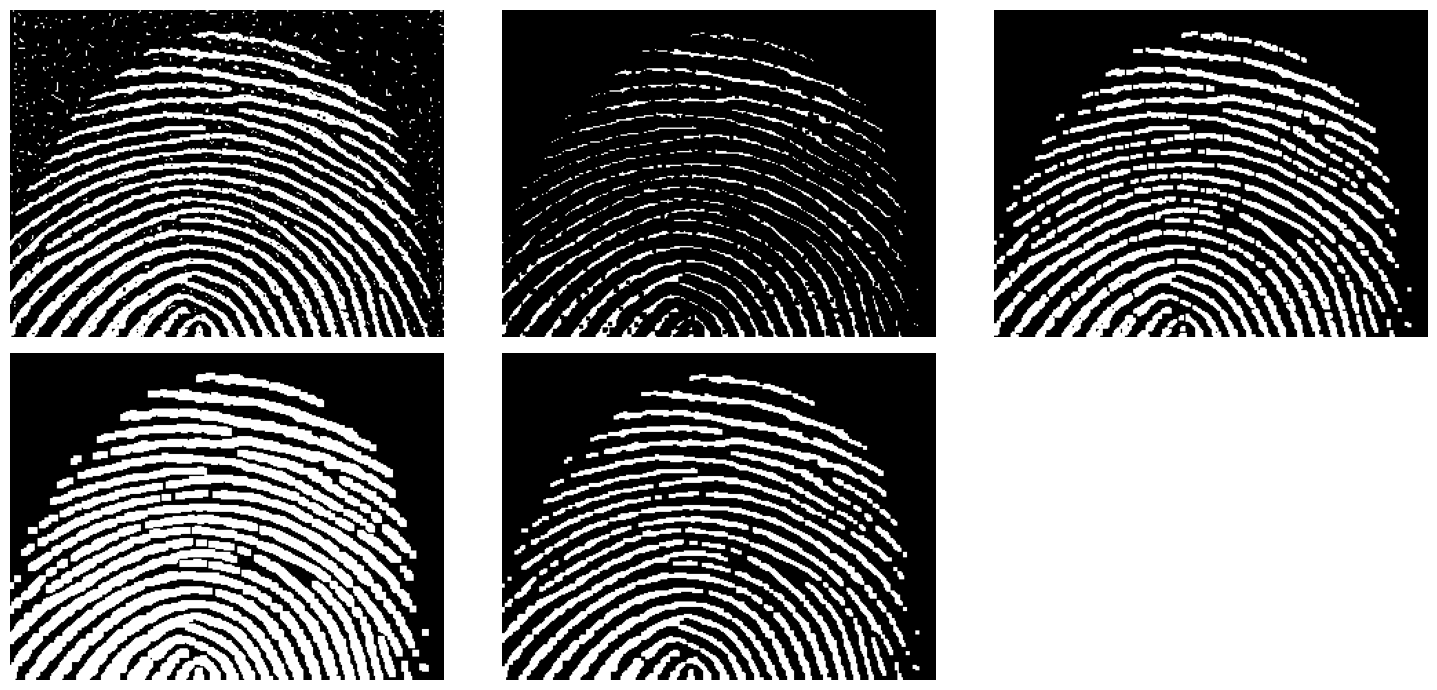

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# 이미지 업로드
uploaded = files.upload()

# 이미지 읽기
img = cv.imread('finger.jpg', cv.IMREAD_GRAYSCALE)

# otsu 이진화
_, bin_img = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# 구조 요소 (3x3 정사각형)
se = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))

# 침식
eroded = cv.erode(bin_img, se)

# 열기
opened = cv.morphologyEx(bin_img, cv.MORPH_OPEN, se)

# 열기 후 팽창
opened_dilated = cv.dilate(opened, se)

# 열기 후 팽창 후 침식 (닫기 of opening)
closed_opened = cv.erode(opened_dilated, se)

# 결과
images = [bin_img, eroded, opened, opened_dilated, closed_opened]

plt.figure(figsize=(15, 7))
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()
